

Store continuous features in a seperate table.


In [1]:
num = vartype('numeric')

num = 
    table vartype subscript:
        Select table variables matching the type 'numeric'
    See Access Data in a Table.

In [2]:

ctdN = ctd(1:1000000, num)


Generate data quality report for continuous features.


In [3]:
Features1=cell(width(ctdN),1);
countN=zeros(width(ctdN),1);
missingN=zeros(width(ctdN),1);
cardN = zeros(width(ctdN), 1);
minN=zeros(width(ctdN),1);
perc25=zeros(width(ctdN),1);
meanN=zeros(width(ctdN),1);
medianN=zeros(width(ctdN),1);
perc75=zeros(width(ctdN),1);
maxN=zeros(width(ctdN),1);
stdN=zeros(width(ctdN),1);

for col =1: width(ctdN)
     Features1(col,1) = ctdN.Properties.VariableNames(col);
     countN(col,1)=height(ctdN.(col));
     missingN(col,1)=100*sum(ismissing(ctdN.(col)))/height(ctdN);
     cardN(col,1)=height(groupsummary(ctdN,col));
     minN(col,1)=min(ctdN.(col));
     perc25(col,1)=prctile(ctdN.(col),25);
     meanN(col,1)=mean(ctdN.(col),'omitnan');
     medianN(col,1)=median(ctdN.(col),'omitnan');
     perc75(col,1)=prctile(ctdN.(col),75);
     maxN(col,1)=max(ctdN.(col));
     stdN(col,1)=std(ctdN.(col),'omitnan');
end

QRctdN=table(Features1,countN,missingN,cardN,minN,perc25,meanN,medianN,perc75,maxN,stdN)


Store categorical features in a seperate table.


In [4]:
cat = vartype('categorical')

cat = 
    table vartype subscript:
        Select table variables matching the type 'categorical'
    See Access Data in a Table.

In [5]:

ctdC = ctd(1:1000000, cat)


Generate data quality report for categorical features.


In [6]:
 Features2=cell(width(ctdC),1);
 countC=zeros(width(ctdC),1);
 missingC=zeros(width(ctdC),1);
 cardC=zeros(width(ctdC), 1);
 modeC=categorical(zeros(width(ctdC), 1));
 modeC_freq=zeros(width(ctdC), 1);
 modeC_per=zeros(width(ctdC), 1);
 modeC2=categorical(zeros(width(ctdC), 1));
 modeC2_freq=zeros(width(ctdC), 1);
 modeC2_per=zeros(width(ctdC), 1);
 for col =1: width(ctdC)
     Features2(col,1)=ctdC.Properties.VariableNames(col);
     countC(col,1)=height(ctdC.(col));
     missingC(col,1)=100*sum(ismissing(ctdC.(col)))/height(ctdC);
     cardC(col,1)=height(groupsummary(ctdC,col));
     [modeC(col,1),modeC_freq(col,1)]=mode(ctdC.(col));
     modeC_per(col, 1)=100*(modeC_freq(col, 1)/height(ctdC.(col)));
     [modeC2(col,1),modeC2_freq(col,1)]=mode(ctdC.(col)((ctdC.(col))~=mode(ctdC.(col))));
     modeC2_per(col, 1)=100*(modeC2_freq(col, 1)/height(ctdC.(col)));
end

QRctdC=table(Features2,countC,missingC,cardC,modeC,modeC_freq,modeC_per,modeC2,modeC2_freq,modeC2_per)


Data visualization for descriptive features after cleaning



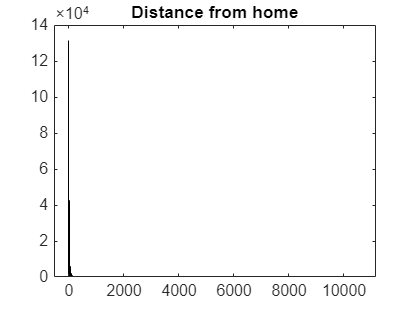

In [7]:
histogram(ctd.distance_from_home);
title("Distance from home");


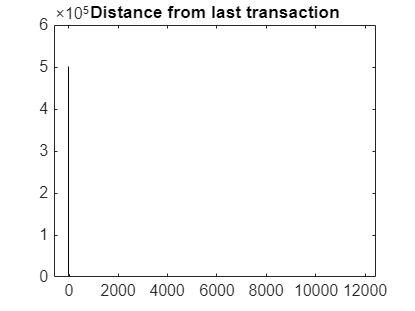

In [8]:

histogram(ctd.distance_from_last_transaction);
title("Distance from last transaction");


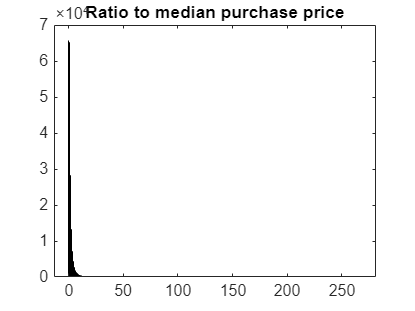

In [9]:

histogram(ctd.ratio_to_median_purchase_price);
title("Ratio to median purchase price");


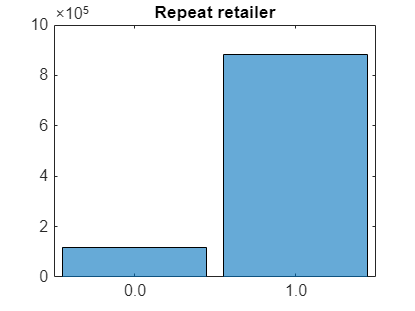

In [10]:

histogram(ctd.repeat_retailer);
title("Repeat retailer");


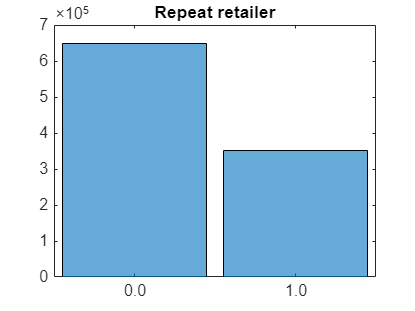

In [11]:

histogram (ctd.used_chip);
title("Repeat retailer");


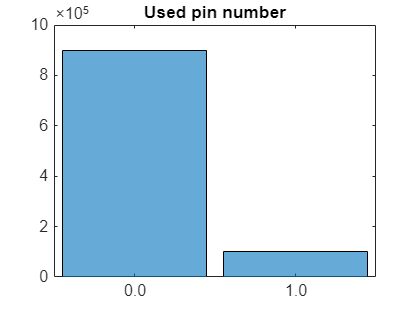

In [12]:

histogram (ctd.used_pin_number);
title("Used pin number");


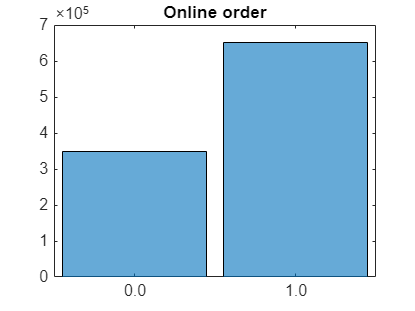

In [13]:

histogram (ctd.online_order);
title("Online order");


Seperate fraud and nonfraud dataset


In [14]:
ctdnf = ctd(ctd.fraud == '0.0', :);
ctdf = ctd(ctd.fraud == '1.0', :);


Create a subset of the dataset


In [15]:
%456,298 nonfraud
%43,701 fraud
% nonfraud / fraud ratio = 91% / 9%
part1=cvpartition(height(ctdnf),'HoldOut',0.50)

part1 = 
Hold-out cross validation partition
   NumObservations: 912597
       NumTestSets: 1
         TrainSize: 456299
          TestSize: 456298
          IsCustom: 0

In [16]:

idxtest1=test(part1)

idxtest1 = 912597x1 logical array
   1
   1
   1
   0
   0
   1
   0
   0
   0
   1

In [17]:

ctd_nf_sub=ctdnf(idxtest1,:)

In [18]:

part2=cvpartition(height(ctdf),'HoldOut',0.50)

part2 = 
Hold-out cross validation partition
   NumObservations: 87403
       NumTestSets: 1
         TrainSize: 43702
          TestSize: 43701
          IsCustom: 0

In [19]:

idxtest2=test(part2)

idxtest2 = 87403x1 logical array
   0
   0
   1
   1
   0
   0
   1
   1
   1
   1

In [20]:

ctd_f_sub=ctdf(idxtest2,:)

In [21]:

% concatinating the newly created subset of non fraud observations with our
% fraud observations to create our dataset
ctd_sub=vertcat(ctd_f_sub,ctd_nf_sub)


Undersampling


In [22]:
% creating a subset of the non fraud observations to match the amount of
% fraud observations
part=cvpartition(height(ctdnf),'HoldOut',0.096)

part = 
Hold-out cross validation partition
   NumObservations: 912597
       NumTestSets: 1
         TrainSize: 824988
          TestSize: 87609
          IsCustom: 0

In [23]:

idxtest=test(part)

idxtest = 912597x1 logical array
   0
   0
   1
   0
   0
   0
   1
   0
   0
   0

In [24]:

ctd_nf_new=ctdnf(idxtest,:)

In [25]:

% concatinating the newly created subset of non fraud observations with our
% fraud observations to create our dataset
ctd_under=vertcat(ctdf,ctd_nf_new)


Oversampling


In [26]:
x = 40000;

% This if statement checks if our prespecified number of desired rows is
% bigger than the actual count of rows in the dataset
if x > height(ctdf)
    error('x should not exceed the number of rows in the dataset.');
end

% using the function randomperm, we loop through our table that includes
% only fraud incidents and store random rows in randomIndices
randomIndices = randperm(height(ctdf), x);

% we store the results of randomIndices into the table called ctdf_rand
ctdf_rand = ctdf(randomIndices, :);

% concatinating the fraud only table with the randomly chosen fraud rows to
ctd_fandrand=vertcat(ctdf,ctdf_rand)

In [27]:

% creating a subset of the not fraud observations, the exact amount of
% which is equal to the newly manufactured fraud dataset
part=cvpartition(height(ctdnf),'HoldOut',0.1396)

part = 
Hold-out cross validation partition
   NumObservations: 912597
       NumTestSets: 1
         TrainSize: 785199
          TestSize: 127398
          IsCustom: 0

In [28]:

idxtest=test(part)

idxtest = 912597x1 logical array
   0
   0
   0
   0
   0
   0
   1
   0
   1
   0

In [29]:

ctd_nf_over=ctdnf(idxtest,:)

In [30]:

%concatinating the manufactured fraud dataset with the subset of not fraud
%observations to create our ready to use dataset
ctd_over=vertcat(ctd_fandrand,ctd_nf_over)


Data visualization of sampling



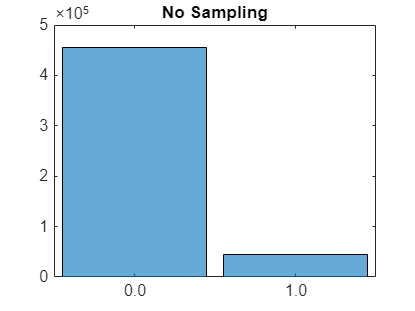

In [31]:
histogram(ctd_sub.fraud);
title("No Sampling");


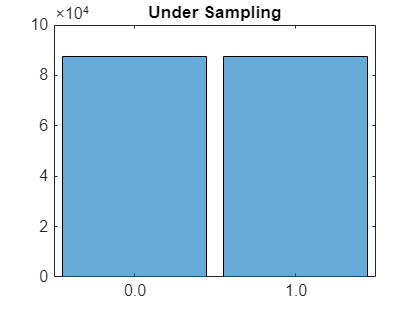

In [32]:

histogram(ctd_under.fraud);
title("Under Sampling");


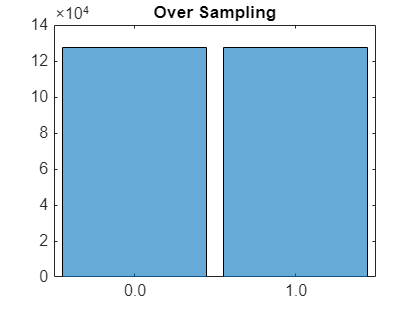

In [33]:

histogram(ctd_over.fraud);
title("Over Sampling");